<a href="https://colab.research.google.com/github/uchan21/IRC_competition_code/blob/yuchan/step_up_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주제 : 웹 크롤링과 전이학습을 통한 이진분류

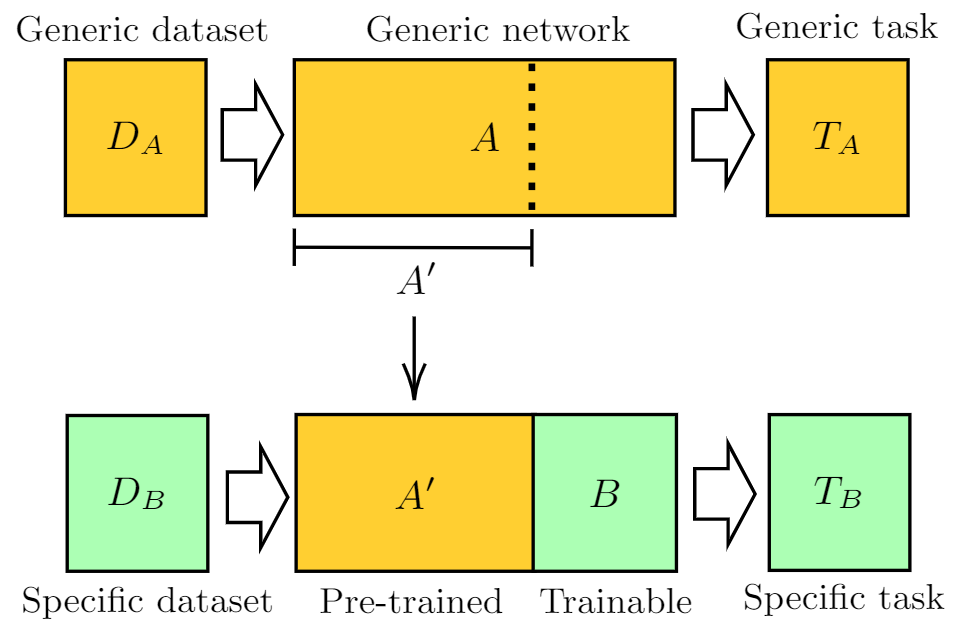

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

**데이터 크롤링을 위한 라이브러리 설치하기**

In [ ]:
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Unpacking objects: 100% (86/86), done.


In [ ]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [ ]:
query = 'night landscape'
downloader.download(query, limit=40, output_dir = './', adult_filter_off=True, force_replace = False, timeout=60)
dataset_split(query,30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://www.tanteam.com/wp-content/uploads/2018/08/milky-way-and-mountains-night-landscape-P8LFK9W.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://wallup.net/wp-content/uploads/2015/12/91789-night-landscape.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://wallup.net/wp-content/uploads/2017/03/15/105863-night-stars-landscape.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://wallup.net/wp-content/uploads/2017/03/28/411876-nature-landscape-photography-Milky_Way-starry_night-lake-reflection.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://wallup.net/wp-content/uploads/2016/01/144229-landscape-night.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://mymodernmet.com/wp/wp-content/uploads/2019/02/night-landscape-photography-7.jpeg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://cdn.photographylife.com/wp-content/uploads/2017/11/Super-high-ISO-night-landscape-photo.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://mymodernmet.com/wp/wp-conten

In [ ]:
query = 'noon landscape'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://thumbs.dreamstime.com/b/noon-trees-landscape-high-island-tobago-west-indies-30708648.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://thumbs.dreamstime.com/z/mountain-landscape-cloudy-summer-noon-mountain-landscape-cloudy-summer-noon-footpath-green-alpine-meadows-beautiful-145478910.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.pinimg.com/originals/f6/71/d1/f671d1080303b5b04a38ea5c21952125.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://framingpainting.com/UploadPic/Nicolas De Stael/big/Noon Landscape.jpg)
[Info] Issue getting: http://framingpainting.com/UploadPic/Nicolas De Stael/big/Noon Landscape.jpg
[Error] URL can't contain control characters. '/UploadPic/Nicolas De Stael/big/Noon Landscape.jpg' (found at least ' ')
#4 이미지 다운로드 (http://2.bp.blogspot.com/-ArgdKde5PfY/UeePcIzB3AI/AAAAAAAAEOY/TYKWXLMIo2Y/s1600/14.+Photograph+Noon+Landscape+by+Cristhian+González.jpg)
[Info] Issue getting: http://2.bp.blogs

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np

In [ ]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 2개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

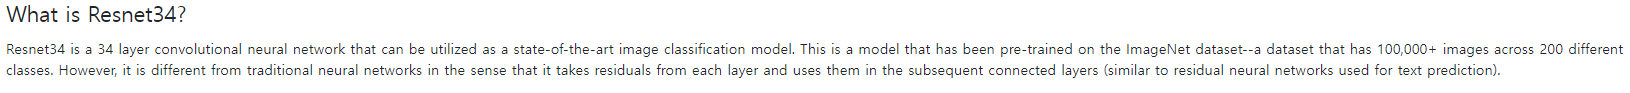

Resnet34는 이미지 분류 모델이다.       
          
34개의 layer를 가지고 있으며 이를 활용한 전이학습을 할 것이다.

In [ ]:
num_epochs = 50
model.train()

for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    print('#{} Loss: {:.4f} Acc: {:.4f}% '.format(epoch, epoch_loss, epoch_acc))

#0 Loss: 0.6441 Acc: 55.7143% 
#1 Loss: 0.5316 Acc: 81.4286% 
#2 Loss: 0.4384 Acc: 82.8571% 
#3 Loss: 0.0618 Acc: 98.5714% 
#4 Loss: 0.0771 Acc: 97.1429% 
#5 Loss: 0.2335 Acc: 91.4286% 
#6 Loss: 0.4735 Acc: 90.0000% 
#7 Loss: 0.2171 Acc: 92.8571% 
#8 Loss: 0.1454 Acc: 92.8571% 
#9 Loss: 0.1714 Acc: 95.7143% 
#10 Loss: 0.2326 Acc: 88.5714% 
#11 Loss: 0.2399 Acc: 94.2857% 
#12 Loss: 0.0115 Acc: 100.0000% 
#13 Loss: 0.3225 Acc: 90.0000% 
#14 Loss: 0.1782 Acc: 92.8571% 
#15 Loss: 0.1469 Acc: 88.5714% 
#16 Loss: 0.2208 Acc: 92.8571% 
#17 Loss: 0.3724 Acc: 88.5714% 
#18 Loss: 0.3286 Acc: 87.1429% 
#19 Loss: 0.3160 Acc: 90.0000% 
#20 Loss: 0.1522 Acc: 91.4286% 
#21 Loss: 0.0896 Acc: 95.7143% 
#22 Loss: 0.3722 Acc: 88.5714% 
#23 Loss: 0.2302 Acc: 91.4286% 
#24 Loss: 0.1519 Acc: 94.2857% 
#25 Loss: 0.3758 Acc: 87.1429% 
#26 Loss: 0.1267 Acc: 95.7143% 
#27 Loss: 0.0143 Acc: 100.0000% 
#28 Loss: 0.0724 Acc: 98.5714% 
#29 Loss: 0.3017 Acc: 94.2857% 
#30 Loss: 0.0378 Acc: 100.0000% 
#31 Loss: 0.143

[예측 결과: noon landscape] (실제 정답: noon landscape)


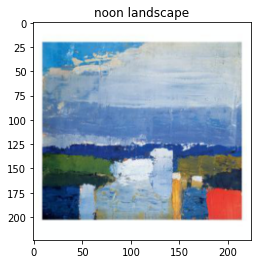

[예측 결과: night landscape] (실제 정답: night landscape)


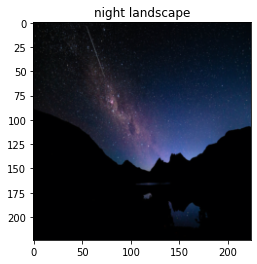

[예측 결과: night landscape] (실제 정답: night landscape)


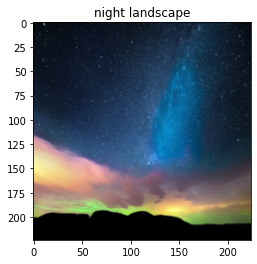

[예측 결과: noon landscape] (실제 정답: noon landscape)


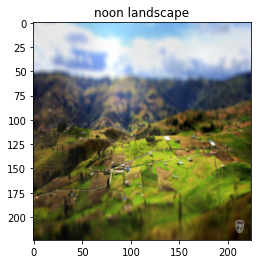

[예측 결과: night landscape] (실제 정답: night landscape)


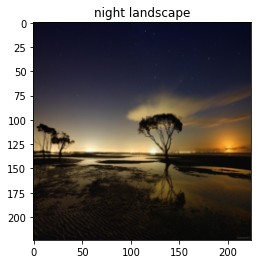

[예측 결과: noon landscape] (실제 정답: noon landscape)


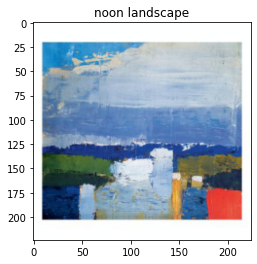

[Test Phase] Loss: 0.0191 Acc: 100.0000% 


In [ ]:
model.eval()
class_names = train_datasets.classes

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        # torch.Tensor를 numpy 객체로 변환
        input = inputs.cpu().data[0]
        input = input.numpy().transpose((1, 2, 0))
        # 이미지 정규화 해제하기
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        input = std * input + mean
        input = np.clip(input, 0, 1)
        plt.imshow(input)
        plt.title(class_names[preds[0]])
        plt.show()

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% '.format(epoch_loss, epoch_acc))


In [ ]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()

#test!!

In [ ]:
!wget https://t1.daumcdn.net/cfile/tistory/2771F1455774025620 -O test_image.jpg

--2022-09-04 09:40:48--  https://t1.daumcdn.net/cfile/tistory/2771F1455774025620
Resolving t1.daumcdn.net (t1.daumcdn.net)... 23.219.154.138, 23.219.154.141, 2600:1408:c400:68::17db:9a46, ...
Connecting to t1.daumcdn.net (t1.daumcdn.net)|23.219.154.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16226 (16K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  15.85K  --.-KB/s    in 0.001s  

2022-09-04 09:40:49 (22.0 MB/s) - ‘test_image.jpg’ saved [16226/16226]



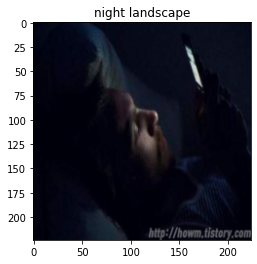

In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], class_names[preds[0]])